Sources:

* International players: [Transfermakt](https://www.transfermarkt.com/premier-league/nationalspieler/wettbewerb/GB1)

* Players performance: [Fantasy Premier League](https://fantasy.premierleague.com/)


In [1]:
from fpl import fpl
api = fpl()

Filtering players without points

Diferencia antes: 0.6894845665337471
Diferencia despues: 0.6518679339415729
DID: -0.03761663259217418


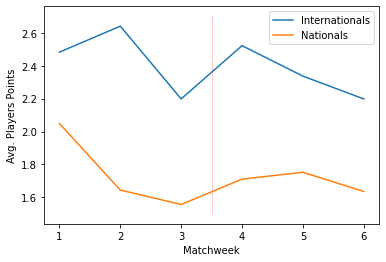

In [2]:
api.DID()

In [3]:
0.03761663259217418 / 0.6894845665337471

0.05455761364070071

Diferencia antes: 1.1597101112273764
Diferencia despues: 0.7586596300079446
DID: -0.4010504812194319


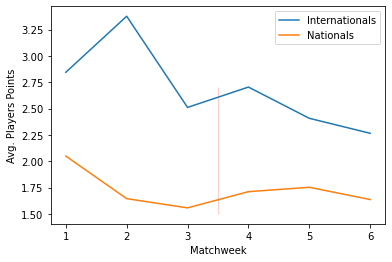

In [4]:
api.DID(True)

In [5]:
-0.4010504812194319 / 1.1597101112273764

-0.3458195952046853

C:\Users\eloyc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ttest_indResult(statistic=0.06928579165903526, pvalue=0.9448166497236522)


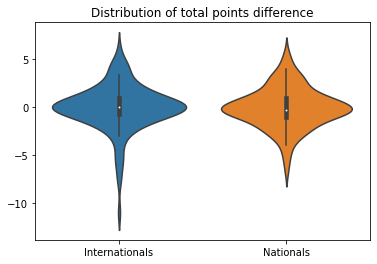

In [6]:
api.matching()